In [25]:
import pandas as pd
import requests 
import json
import plotly.graph_objects as go
import numpy as np
import matplotlib.pyplot as plt

In [8]:
#Creating a function to pull in updated GDP data from DBnomics web API. 
def scrapeindicator(url):
    r = requests.get(url)
    r_json = r.json()
    periods = r_json['series']['docs'][0]['period']
    values = r_json['series']['docs'][0]['value']
    dataset = r_json['series']['docs'][0]['dataset_name']
    indicators = pd.DataFrame(values, index = periods)
    indicators.columns = [dataset]
    return indicators

new_df=scrapeindicator('https://api.db.nomics.world/v22/series/BEA/GDPbyIndustry-208/II-Q?observations=1',)
new_df.rename(columns={'Real Gross Output by Industry':'GDP'},inplace=True)
new_df['open']=new_df['GDP'].shift(3)
new_df['close']=new_df['GDP']
new_df.drop('GDP',axis=1,inplace=True)
new_df['high']=new_df['close'].shift(2)
new_df['low']=new_df['close'].shift(1)
new_df

,open,close,high,low
2005-Q1,NaN,27405.0,NaN,NaN
2005-Q2,NaN,27648.1,NaN,27405.0
2005-Q3,NaN,27853.3,27405.0,27648.1
2005-Q4,27405.0,28065.8,27648.1,27853.3
2006-Q1,27648.1,28327.9,27853.3,28065.8
...,...,...,...,...
2019-Q2,33946.9,34304.5,34021.1,34169.6
2019-Q3,34021.1,34494.2,34169.6,34304.5
2019-Q4,34169.6,34611.8,34304.5,34494.2
2020-Q1,34304.5,34261.3,34494.2,34611.8


In [10]:
#Bringing in the data to show stochastic oscillators on us gdp data since 1947. 
df=pd.read_csv('./raw data/GDP1.csv', index_col='DATE')
df['open']=df['GDP'].shift(3)
df['close']=df['GDP']
df.drop('GDP',axis=1,inplace=True)
df['high']=df['close'].shift(2)
df['low']=df['close'].shift(1)
df

,open,close,high,low
DATE,,,,
1947-01-01,NaN,243.164,NaN,NaN
1947-04-01,NaN,245.968,NaN,243.164
1947-07-01,NaN,249.585,243.164,245.968
1947-10-01,243.164,259.745,245.968,249.585
1948-01-01,245.968,265.742,249.585,259.745
...,...,...,...,...
2019-04-01,20742.723,21329.877,20909.853,21115.309
2019-07-01,20909.853,21540.325,21115.309,21329.877
2019-10-01,21115.309,21747.394,21329.877,21540.325


In [11]:
high_df=[]
for a,b in zip(df['high'], df['low']): 
    if a > b:
        high_df.append(a)
    else:
        high_df.append(b)

In [12]:
low_df=[]
for a,b in zip(df['high'], df['low']): 
    if a < b:
        low_df.append(a)
    else:
        low_df.append(b)

In [13]:
df['High']=high_df
df['Low']=low_df
df.head(15)

,open,close,high,low,High,Low
DATE,,,,,,
1947-01-01,NaN,243.164,NaN,NaN,NaN,NaN
1947-04-01,NaN,245.968,NaN,243.164,243.164,243.164
1947-07-01,NaN,249.585,243.164,245.968,245.968,243.164
1947-10-01,243.164,259.745,245.968,249.585,249.585,245.968
1948-01-01,245.968,265.742,249.585,259.745,259.745,249.585
1948-04-01,249.585,272.567,259.745,265.742,265.742,259.745
1948-07-01,259.745,279.196,265.742,272.567,272.567,265.742
1948-10-01,265.742,280.366,272.567,279.196,279.196,272.567
1949-01-01,272.567,275.034,279.196,280.366,280.366,279.196


In [17]:
#this separates the information so that a period of four quarters represents one day of a stock market instance. 
df.drop(['high','low'],axis=1, inplace=True)
df.fillna(0,inplace=True)
df1=df.astype(float)
array_close = np.array(df1['close'])
array_open = np.array(df1['open'])
array_high = np.array(df1['High'])
array_low = np.array(df1['Low'])

,open,close,High,Low
DATE,,,,
1947-01-01,0.000,243.164,0.000,0.000
1947-04-01,0.000,245.968,243.164,243.164
1947-07-01,0.000,249.585,245.968,243.164
1947-10-01,243.164,259.745,249.585,245.968
1948-01-01,245.968,265.742,259.745,249.585
...,...,...,...,...
2019-04-01,20742.723,21329.877,21115.309,20909.853
2019-07-01,20909.853,21540.325,21329.877,21115.309
2019-10-01,21115.309,21747.394,21540.325,21329.877


In [19]:
# Algorithm to find the elements necessary for the stochastic oscillator formula
#Finding the highest values in a 14 period of ts_model
y=0
z=0
# kperiods are 14 array start from 0 index
kperiods=4
array_highest=[]
for x in range(0,array_high.size-kperiods):
    z=array_high[y]
    for j in range(0,kperiods):
        if(z<array_high[y+1]):
            z=array_high[y+1]
        y=y+1
    # creating list highest of k periods
    array_highest.append(z)
  # skip one from starting after each iteration
    y=y-(kperiods-1)
print("Highest array size",len(array_highest))
# print(array_highest)

Highest array size 290


In [20]:
# Finding the lowest values in a 14 period of ts_model
y=0
z=0
array_lowest=[]
for x in range(0,array_low.size-kperiods):
    z=array_low[y]
    for j in range(0,kperiods):
        if(z>array_low[y+1]):
            z=array_low[y+1]
        y=y+1
    # creating list lowest of k periods
    array_lowest.append(z)
  # skip one from starting after each iteration
    y=y-(kperiods-1)
print("Lowest array size",len(array_lowest))
# print(array_lowest)

Lowest array size 290


In [21]:
# Finding %K
Kvalue=[]
for x in range(kperiods,array_close.size):
    k = ((array_close[x]-array_lowest[x-kperiods])*100/(array_highest[x-kperiods]-array_lowest[x-kperiods]))
    Kvalue.append(k)
print(len(Kvalue))
# print(Kvalue)

290


In [23]:
y=0
# dperiods for calculate d values
dperiods=3 #The rolling average of %k values
Dvalue=[0,0]
mean=0
for x in range(0,len(Kvalue)-dperiods+1):
    sum=0
    for j in range(0,dperiods):
        sum=Kvalue[y]+sum
        y=y+1
    mean=sum/dperiods
    # d values for %d line adding in the list Dvalue
    Dvalue.append(mean)
  # skip one from starting after each iteration
    y=y-(dperiods-1)
print(len(Dvalue))
# print(Dvalue)

290


Text(0.5, 1.0, 'Stochastic Oscillator')

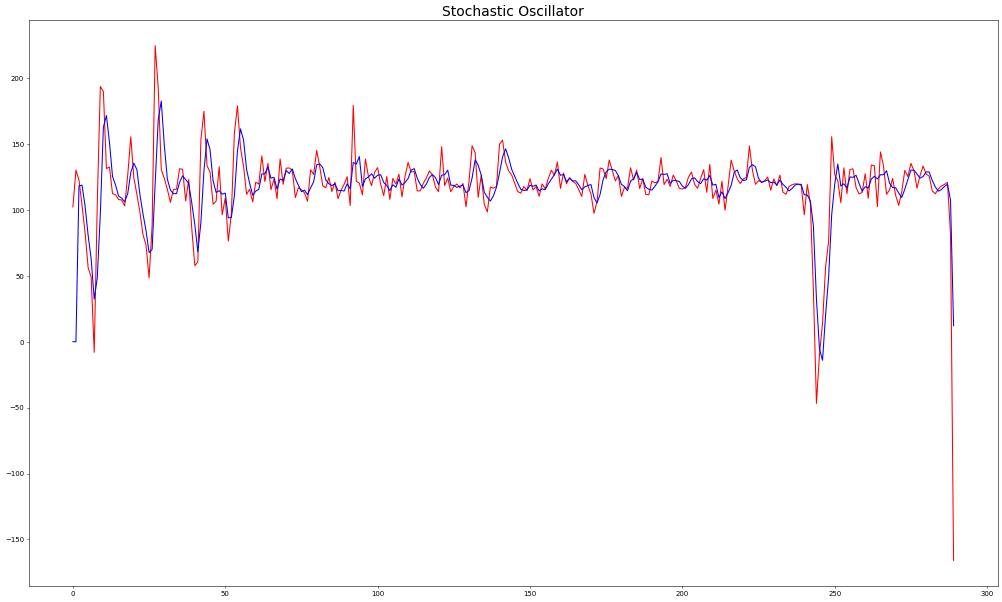

In [26]:
# Visualising the result
plt.figure(figsize=(25,15), dpi=50, facecolor='w', edgecolor='k')
ax = plt.gca() 
plt.plot(Kvalue,color='red',label = '%K line')
plt.plot(Dvalue,color='blue',label = '%D line')
plt.title('Stochastic Oscillator', fontsize=20)

In [28]:
# Everytime we observe the data go below or above our benchmarks, then we can safely make an inference that the economy is not healthy. 
# While over our threshhold parameters, and the Kvalue and Dvalue change in direction, then the market has begun to correct. This would allow
# us to gauge the health of the economy a full 6-8 months earlier than traditional methods. 
print(f'Kvalue (Red) for the last four fiscal quarters {Kvalue[-4::]}')
print(f'Dvalue (Blue) for the last four fiscal quarters {Dvalue[-4::]}')

Kvalue for the last four fiscal quarters [119.34865794704608, 120.96536097003862, 81.4610952242076, -165.9308618921342]
Dvalue for the last four fiscal quarters [117.82286434498876, 119.51291263456234, 107.25837138043077, 12.165198100704004]
